<a href="https://colab.research.google.com/github/pyailabs/HandsOn_AI_ML/blob/main/02_Session_Data_Visualisation_DS_fig10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import warnings
import datetime as dt
warnings.filterwarnings('ignore')

In [3]:
dfm = pd.read_csv('https://raw.githubusercontent.com/cypherkrish/PythonDataScience/main/Data/matchs.csv')
dfd = pd.read_csv('https://raw.githubusercontent.com/cypherkrish/PythonDataScience/main/Data/deliveris.csv')

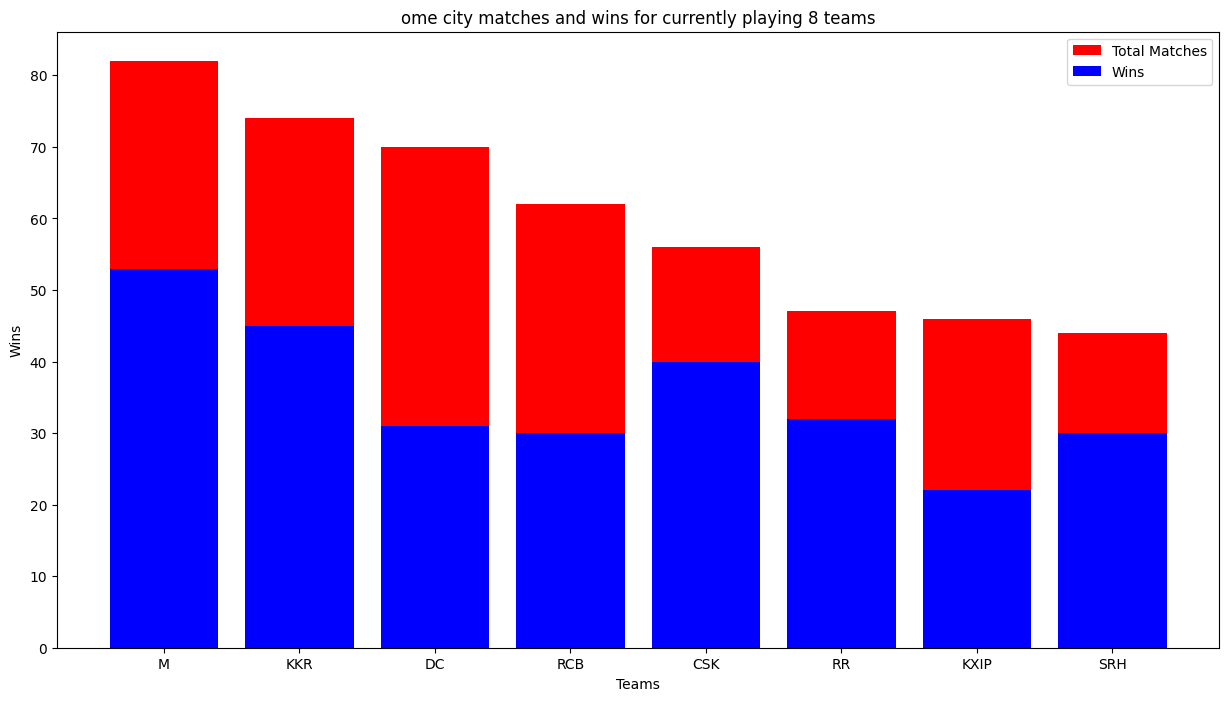

In [5]:
fig10,ax10=plt.subplots(figsize=(15,8))


home_city =  {
    'winner': ['Sunrisers Hyderabad','Kolkata Knight Riders','Kings XI Punjab','Royal Challengers Bangalore','Mumbai Indians','Delhi Capitals','Chennai Super Kings','Rajasthan Royals'],
    'home_city': ['Hyderabad', 'Kolkata','Chandigarh','Bangalore','Mumbai','Delhi','Chennai','Jaipur'],
    'winner_short': ['SRH','KKR','KXIP','RCB','M','DC','CSK','RR']

}

home_city_df = pd.DataFrame(home_city)
totalHomeMatches = len(dfm[((dfm['team1'] == 'Royal Challengers Bangalore') | (dfm['team2'] == 'Royal Challengers Bangalore'))& (dfm['city'] == 'Bangalore') ])
homeMatches_list = []
winnings_list = []
losses_list = []

for i, r in home_city_df.iterrows():
    #print(r['winner'], r['home_city'])
    totalHomeMatches = len(dfm[((dfm['team1'] == r['winner']) | (dfm['team2'] == r['winner'])) & (dfm['city'] == r['home_city']) ])
    winnings = len(dfm[(dfm['winner'] == r['winner'])  & (dfm['city'] == r['home_city']) ])
    losses = totalHomeMatches - winnings
    homeMatches_list.append(totalHomeMatches)
    winnings_list.append(winnings)
    losses_list.append(losses)
    #print(totalHomeMatches, winnings, losses)

home_city['Total Matches'] = homeMatches_list
home_city['Wins'] = winnings_list
home_city['losses'] = losses_list
HomeMatchStatus = pd.DataFrame(home_city).reset_index()


HomeMatchStatus = HomeMatchStatus.sort_values(by = 'Total Matches', ascending=False )
plt.bar(HomeMatchStatus['winner_short'], HomeMatchStatus['Total Matches'], color='r')
plt.bar(HomeMatchStatus['winner_short'], HomeMatchStatus['Wins'], color='b')
plt.xlabel("Teams")
plt.ylabel("Wins")
plt.legend(["Total Matches", "Wins"])
plt.title("ome city matches and wins for currently playing 8 teams")

plt.show()